In [2]:
file_version = 44

In [3]:
import pickle
#불러오기
with open(f"./data/refined_train_X{file_version}", 'rb') as pickle_filename:
	train_X = pickle.load(pickle_filename)

with open(f"./data/refined_train_y{file_version}", 'rb') as pickle_filename:
	train_y = pickle.load(pickle_filename)
    
with open(f"./data/refined_val_X{file_version}", 'rb') as pickle_filename:
	val_X = pickle.load(pickle_filename)

with open(f"./data/refined_val_y{file_version}", 'rb') as pickle_filename:
	val_y = pickle.load(pickle_filename)     

with open(f"./data/refined_test{file_version}", 'rb') as pickle_filename:
	test = pickle.load(pickle_filename)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') 

In [5]:
train = pd.read_csv("./data/train.csv")


In [6]:
for col in train.columns:
    보간값 = train[col].mode().values[0] # 최빈값
#     print(보간값)
    train[col] = train[col].fillna(보간값)     

In [7]:
df = pd.concat([train_X, train_y], axis=1)
df.shape

(13505, 59)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13505 entries, 0 to 12928
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   encoder__x0_COMPONENT2  11276 non-null  float64
 1   encoder__x0_COMPONENT3  11276 non-null  float64
 2   encoder__x0_COMPONENT4  11276 non-null  float64
 3   encoder__x1_2008        11276 non-null  float64
 4   encoder__x1_2009        11276 non-null  float64
 5   encoder__x1_2010        11276 non-null  float64
 6   encoder__x1_2011        11276 non-null  float64
 7   encoder__x1_2012        11276 non-null  float64
 8   encoder__x1_2013        11276 non-null  float64
 9   encoder__x1_2014        11276 non-null  float64
 10  encoder__x1_2015        11276 non-null  float64
 11  encoder__x1_2016        11276 non-null  float64
 12  encoder__x1_2017        11276 non-null  float64
 13  encoder__x1_2018        11276 non-null  float64
 14  encoder__x1_2019        11276 non-null

In [9]:
data = train.loc[:, 'ANONYMOUS_1' : 'Y_LABEL']

In [10]:
# data.corr()

In [11]:
df2 = pd.DataFrame(data.corr()["Y_LABEL"].sort_values(ascending=False))
df2

,Y_LABEL
Y_LABEL,1.000000
AL,0.370512
BA,0.104840
FE,0.047992
NI,0.046806
ANONYMOUS_1,0.044197
SI,0.036731
PQINDEX,0.028966
S,0.027923
TI,0.025637


In [12]:
cutline = 0.009
df3 = df2[(df2["Y_LABEL"] < cutline) & (df2["Y_LABEL"] > (cutline*-1))]
df3.sort_values

<bound method DataFrame.sort_values of                       Y_LABEL
CO                   0.008175
P                    0.007602
FH2O                 0.006188
CD                   0.003960
FTBN                 0.003912
V100                 0.003376
LI                   0.002921
SN                   0.002359
U6                   0.001467
MO                   0.001206
U14                  0.000352
SOOTPERCENTAGE       0.000212
U20                 -0.000218
U4                  -0.000281
SB                  -0.002028
U25                 -0.002432
U50                 -0.003205
PB                  -0.003549
H2O                 -0.004262
SAMPLE_TRANSFER_DAY -0.004315
FUEL                -0.005844
U100                -0.007233
U75                 -0.008045
MG                  -0.008807>

In [13]:
df3.index.tolist()

['CO',
 'P',
 'FH2O',
 'CD',
 'FTBN',
 'V100',
 'LI',
 'SN',
 'U6',
 'MO',
 'U14',
 'SOOTPERCENTAGE',
 'U20',
 'U4',
 'SB',
 'U25',
 'U50',
 'PB',
 'H2O',
 'SAMPLE_TRANSFER_DAY',
 'FUEL',
 'U100',
 'U75',
 'MG']

In [14]:
# sns.pairplot(data)

In [15]:
# sns.clustermap(data)

In [16]:
# colormap = plt.cm.PuBu
# plt.figure(figsize = (15,15))
# sns.heatmap(data.corr(),annot = True)

In [17]:
train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [18]:
target = "AL"
정상 = train[train["Y_LABEL"] == 0][target]
이상= train[train["Y_LABEL"] == 1][target]
정상 = pd.DataFrame(정상)

<AxesSubplot:xlabel='AL', ylabel='Density'>

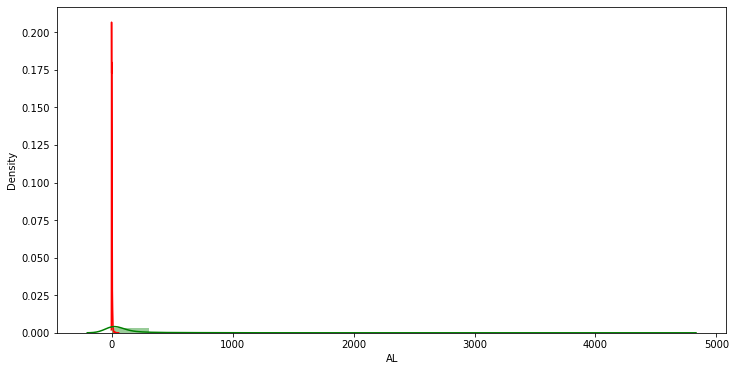

In [19]:
plt.figure(figsize = (12,6))
sns.distplot(정상,bins = 15, color="red")
sns.distplot(이상,bins = 15, color="green")

<AxesSubplot:>

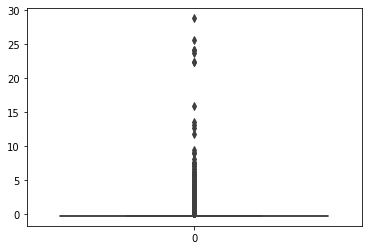

In [20]:
sns.boxplot(data=df['BA'])